In [1]:
%matplotlib inline
import readline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rpy2.robjects as robjects
from scipy import stats

In [2]:
robjects.r['load']('data.RData')
data = pd.Series(np.array(robjects.r['data']))

In [3]:
data.head()

0    2.0
1    2.0
2    4.0
3    6.0
4    4.0
dtype: float64

In [4]:
len(data)

50

In [7]:
data.describe()

count    50.00000
mean      3.56000
std       1.72804
min       0.00000
25%       2.00000
50%       3.00000
75%       4.75000
max       7.00000
dtype: float64

(array([  1.,   3.,  11.,  12.,  10.,   5.,   4.,   4.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5]),
 <a list of 8 Patch objects>)

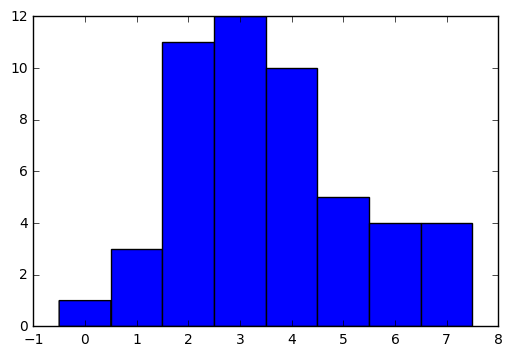

In [9]:
plt.hist(data,bins=np.arange(-0.5,8.5,1.0))

In [10]:
data.var()

2.986122448979592

In [13]:
x = np.arange(0,10)
prob = pd.Series(stats.poisson.pmf(x,3.56),index=x)
prob

0    0.028439
1    0.101242
2    0.180211
3    0.213851
4    0.190327
5    0.135513
6    0.080404
7    0.040891
8    0.018197
9    0.007198
dtype: float64

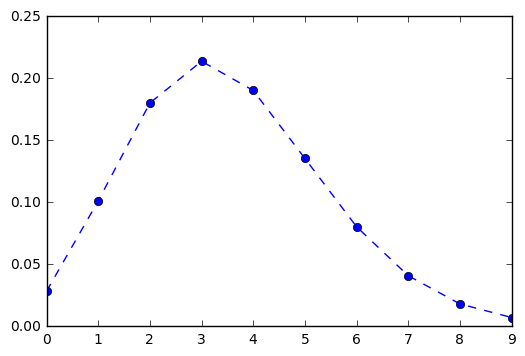

In [14]:
plt.plot(prob,'--o')

(array([  1.,   3.,  11.,  12.,  10.,   5.,   4.,   4.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5]),
 <a list of 8 Patch objects>)

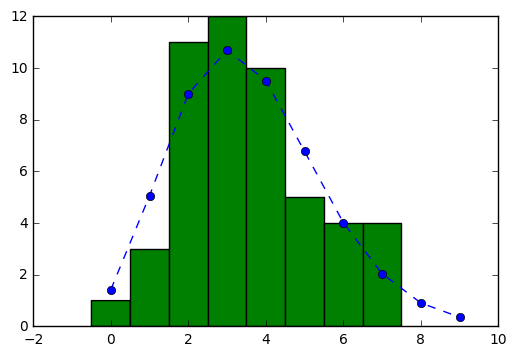

In [17]:
plt.plot(prob*50,'--o')
plt.hist(data,bins=np.arange(-0.5,8.5,1.0))

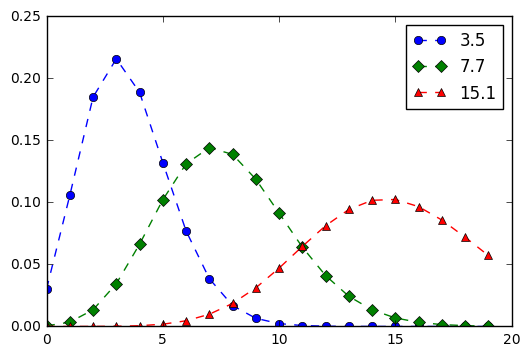

In [21]:
x = np.arange(0,20)
plt.plot(x,stats.poisson.pmf(x,3.5),'--o',label=3.5)
plt.plot(x,stats.poisson.pmf(x,7.7),'--D',label=7.7)
plt.plot(x,stats.poisson.pmf(x,15.1),'--^',label=15.1)
plt.legend(loc='upper right')

In [22]:
t_lambda = [2.0,2.4,2.8,3.2,3.6,4.0,4.4,4.8,5.2]

In [24]:
pieces = []
x = np.arange(0,10)
for lam in t_lambda:
    distribution = pd.Series(stats.poisson.pmf(x,lam),index=x,name='lambda_%s'%lam)*50
    pieces.append(distribution)

In [25]:
dd = pd.concat(pieces,axis=1)

In [26]:
dd.head()

,lambda_2.0,lambda_2.4,lambda_2.8,lambda_3.2,lambda_3.6,lambda_4.0,lambda_4.4,lambda_4.8,lambda_5.2
0,6.766764,4.535898,3.040503,2.038110,1.366186,0.915782,0.613867,0.411487,0.275828
1,13.533528,10.886154,8.513409,6.521953,4.918270,3.663128,2.701015,1.975139,1.434307
2,13.533528,13.063385,11.918772,10.435124,8.852886,7.326256,5.942233,4.740334,3.729198
3,9.022352,10.450708,11.124187,11.130799,10.623463,9.768341,8.715274,7.584535,6.463942
4,4.511176,6.270425,7.786931,8.904639,9.561117,9.768341,9.586802,9.101442,8.403125


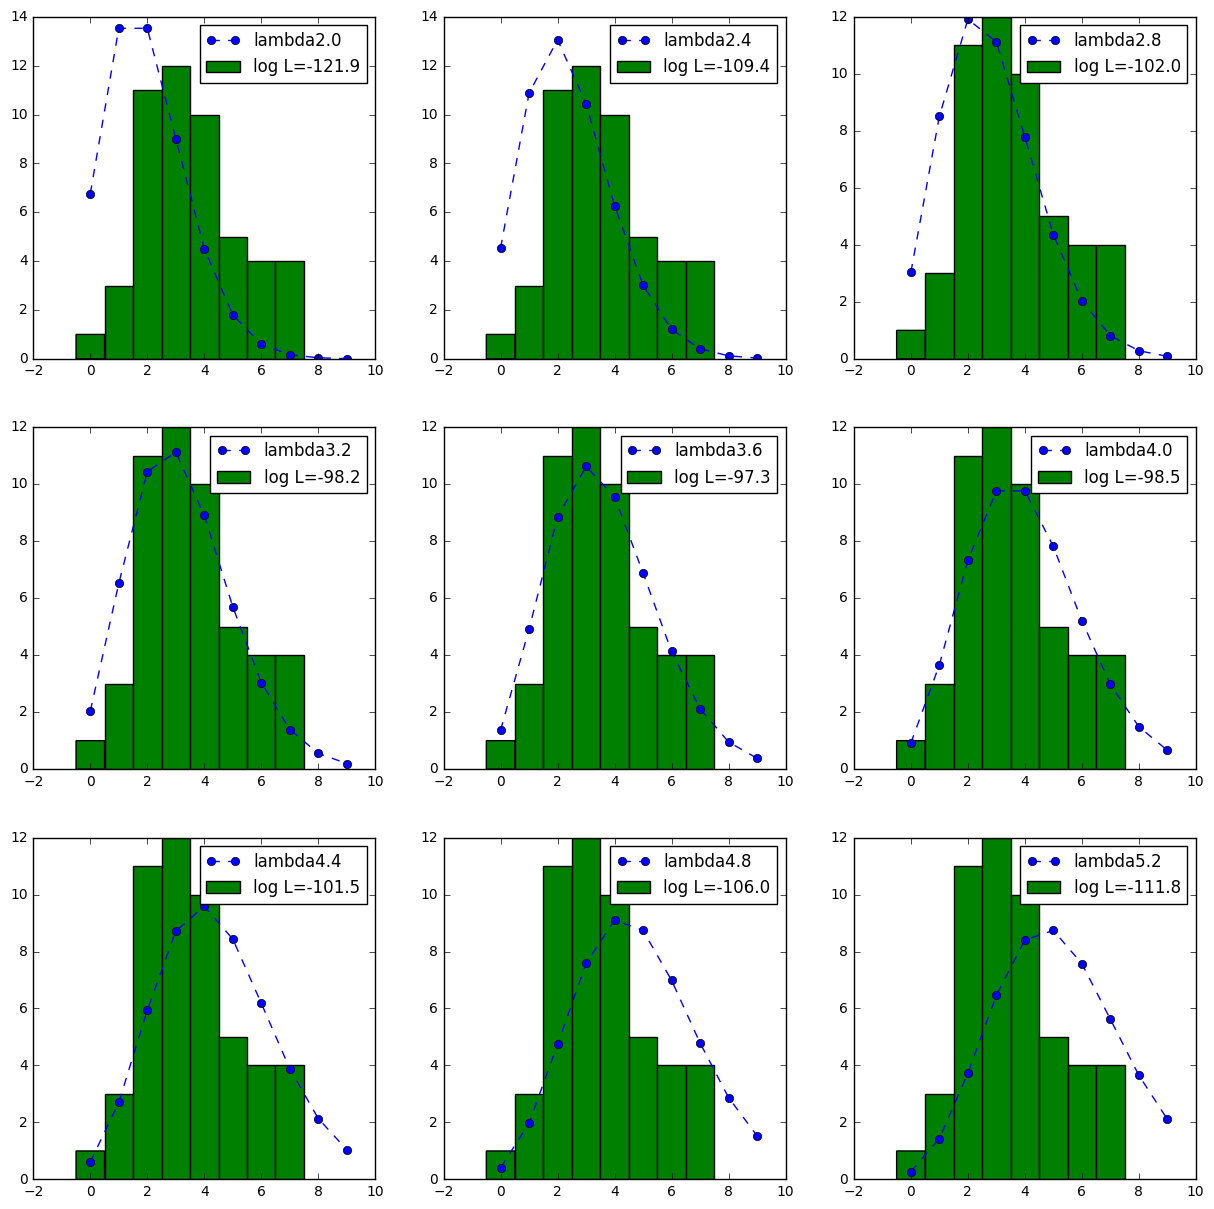

In [30]:
import itertools
fig,axes = plt.subplots(3,3,figsize=(15,15))
for i,j in enumerate(itertools.product(range(3),range(3))):
    log_likelihood = np.sum(stats.poisson.logpmf(data,t_lambda[i]))
    dd['lambda_%.1f'%t_lambda[i]].plot(style='--o',label='lambda%.1f'%t_lambda[i],ax=axes[j[0]][j[1]])
    axes[j[0]][j[1]].hist(data,bins=np.arange(-0.5,8.5,1.0),label='log L=%.1f'%log_likelihood)
    axes[j[0]][j[1]].legend(loc='upper right')
    axes[j[0]][j[1]].set_xlim((-2,10))
plt.show()

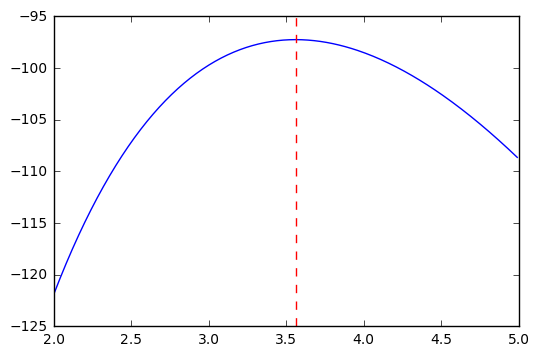

In [32]:
x = np.arange(2.0,5.0,0.01)
logL = np.array([sum(stats.poisson.logpmf(data,i)) for i in x])
plt.plot(x,logL)
plt.axvline(x[np.argmax(logL)],c='r',ls='--')

In [33]:
print x[np.argmax(logL)]

3.56


In [34]:
likeliwoods = []
for i in range(3000):
    data_a = np.random.poisson(3.5,50)
    x = np.arange(2.0,5.0,0.01)
    logL = np.array([np.sum(stats.poisson.logpmf(data_a,i)) for i in x])
    likeliwoods.append(x[np.argmax(logL)])

(array([   1.,    3.,    7.,   25.,   47.,  118.,  195.,  323.,  391.,
         450.,  452.,  361.,  266.,  204.,   74.,   50.,   18.,    8.,    2.]),
 array([ 2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,  3.4,  3.5,
         3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4]),
 <a list of 19 Patch objects>)

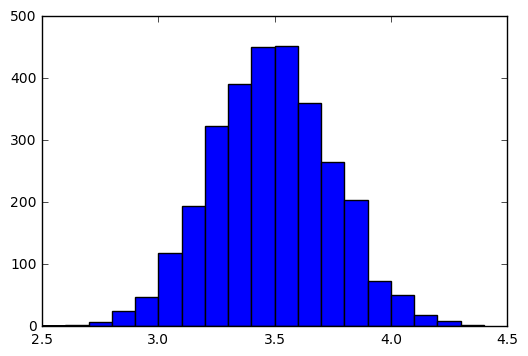

In [35]:
plt.hist(likeliwoods,bins=np.arange(2.5,4.5,0.1))
